## **Exploratory Data Analysis**

- 1- DataFrame Estados.
- 2- DataFrame Yelp.
- 3- Correlación entre variables.
- 4- Cantidad de restaurantes mexicanos por año. 
- 5- Cantidad de restaurantes mexicanos por trimestre. 
- 6- Cantidad de restaurantes mexicanos por estado.
- 7- Cantidad de sucursales por empresa.
- 8- Evolución de la cantidad de restaurantes mexicanos por empresa por trimestre por año.
- 9- Cantidad de restaurantes mexicanos por empresa por estado.
- 10- Calificación de los restaurantes mexicanos.
- 11- Nube de palabras de las reseñas de los clientes.

In [2]:
# Libreria utilizada.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### <font color="#ff5653"> 1- DataFrame Estados </font>

In [3]:
# Abrimos el archivo
claves_estados = pd.read_csv("Estados.csv", sep=";")

In [4]:
# Visualización preliminar del dataframe.
claves_estados.head(5)

,NombreEstado,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [5]:
# Pasamos el dataframe a diccionario. Y utilizamos la columna "State" como clave y "NombreEstado" como valor.
# Los datos impresos lo utilizamos para colocar los nombres a cada estado en el archivo de Yelp.
claves_estados = claves_estados.set_index("State")["NombreEstado"].to_dict()
print(claves_estados)

{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'NC': 'Carolina del Norte', 'SC': 'Carolina del Sur', 'CO': 'Colorado', 'CT': 'Connecticut', 'ND': 'Dakota del Norte', 'SD': 'Dakota del Sur', 'DE': 'Delaware', 'DC': 'Distrito de Columbia', 'FL': 'Florida', 'AA': 'Fuerzas Armadas de América', 'AE': 'Fuerzas Armadas de Europa', 'AP': 'Fuerzas Armadas del Pacífico', 'GA': 'Georgia', 'HI': 'Hawai', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Luisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'Nueva Hampshire', 'NJ': 'Nueva Jersey', 'NY': 'Nueva York', 'NM': 'Nuevo México', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregón', 'PA': 'Pensilvania', 'RI': 'Rhode Island', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 

### <font color="#ff5653"> 2- Dataframe Yelp</font>

In [6]:
# Abrimos el archivo
yelp=pd.read_csv("ETL_YELP_todos_estados.csv")

In [7]:
# Cambiamos las claves de los estados por el nombre de los estados en la columna "State"
# Utilizamos el diccionario creado anteriormente como fuente de datos.
yelp['State'] = yelp['State'].replace({'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'NC': 'Carolina del Norte', 'SC': 'Carolina del Sur', 'CO': 'Colorado', 'CT': 'Connecticut', 'ND': 'Dakota del Norte', 'SD': 'Dakota del Sur', 'DE': 'Delaware', 'DC': 'Distrito de Columbia', 'FL': 'Florida', 'AA': 'Fuerzas Armadas de América', 'AE': 'Fuerzas Armadas de Europa', 'AP': 'Fuerzas Armadas del Pacífico', 'GA': 'Georgia', 'HI': 'Hawai', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Luisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'Nueva Hampshire', 'NJ': 'Nueva Jersey', 'NY': 'Nueva York', 'NM': 'Nuevo México', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregón', 'PA': 'Pensilvania', 'RI': 'Rhode Island', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WV': 'Virginia Occidental', 'WA': 'Washington', 'WI': 'Wisconsin', 'WY': 'Wyoming'})

In [31]:
# Visualizamos los cambios en la columna "State"
yelp

,Business_id,Name,Categories,Stars,Text,Useful,Funny,Cool,Date,User_id,City,State,Latitude,Longitude,Address
0,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,Hands down best Mexican in Indy! This place al...,0,0,0,2019-03-21,4K_WOyp5edBa9-JtMjxiwQ,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd
1,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,After reading all the reviews & hearing great ...,1,0,1,2019-04-20,opsegPYOBbMrULOm7QpkJw,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd
2,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",4.0,"First time here, had decent reviews so I wante...",2,0,0,2019-02-08,da1by_dHiaH7WziqVjCnAQ,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd
3,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",4.0,Service was fast! Got the cabeza taco and it w...,1,0,1,2019-07-02,3YdsWEXfse4AymDuTDoQpQ,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd
4,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,"Man, was I blown away!\n\nWas looking for a de...",2,0,0,2019-04-05,4ynHzlHrlJmK3zBhi9FL6A,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142517,Q_kP5O8EfknEiZUeMR4Gow,Carniceria Dos Amigos,"Food, Grocery, Specialty Food, Meat Shops, Mex...",5.0,Just happened to be in the area and checked ou...,0,0,0,2021-04-06,9ZA6BuMKsqfkpODcfJndww,Reno,Nevada,39.493354,-119.787114,677 E Moana Ln
142518,ICJE_-SCNJAHDtUpK1O0nw,Rasta Taco Catering,"Caterers, Restaurants, Mexican, Event Planning...",5.0,Absolutely wonderful way to spice up any event...,0,0,0,2019-10-17,BuEl4RnS6VxwU8I2FzX1bg,Carpinteria,California,34.419934,-119.561382,"3375 Foothill Rd, Ste 6333"
142519,rgcbGLaBL3DPQLV-JFR2ww,Taqueria El Pollito,"Food Stands, Food, Food Trucks, Restaurants, M...",1.0,So this place has the best street tacos I've e...,1,0,0,2021-08-04,VQYIXe6izm67WSlaV8wWmA,Nashville,Tennessee,36.121217,-86.775505,800 Kirkwood Ave
142520,OQE4Zk-Cx3fpuCOd2VLMrA,La Ceiba,"Latin American, Mexican, Restaurants",4.0,I wanted to show this place some love since th...,1,0,2,2022-01-12,fiGSeA6Cew0IfPy0w2IZMg,Indianapolis,Indiana,39.780297,-86.250163,5250 W 10th St


In [8]:
# Columnas y tipos de datos del dataframe
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142522 entries, 0 to 142521
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Business_id  142522 non-null  object 
 1   Name         142522 non-null  object 
 2   Categories   142522 non-null  object 
 3   Stars        142522 non-null  float64
 4   Text         142522 non-null  object 
 5   Useful       142522 non-null  int64  
 6   Funny        142522 non-null  int64  
 7   Cool         142522 non-null  int64  
 8   Date         142522 non-null  object 
 9   User_id      142522 non-null  object 
 10  City         142522 non-null  object 
 11  State        142522 non-null  object 
 12  Latitude     142522 non-null  float64
 13  Longitude    142522 non-null  float64
 14  Address      142020 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 16.3+ MB


In [9]:
# Convertimos el tipo de dato de la columna "Date" a formato datetime.
# Para poder copiar las fechas de la columna.
yelp["Date"] = pd.to_datetime(yelp["Date"])

In [10]:
# Vemos la última fecha de carga de datos.
ultima_fecha = yelp["Date"].max()
print(f"La última fecha de carga de datos en la columna Date es: {ultima_fecha}")

La última fecha de carga de datos en la columna Date es: 2022-01-19 00:00:00


In [12]:
# Vemos la primera fecha de carga de datos.
ultima_fecha = yelp["Date"].min()
print(f"La primera fecha de carga de datos en la columna Date es: {ultima_fecha}")

La primera fecha de carga de datos en la columna Date es: 2019-01-01 00:00:00


- Eliminamos los datos cargados el año 2022 por **no ser representativo** para el trimestre. Solo tiene datos cargados hasta el 19 de enero, si hubiera tenido cargado datos hasta el 31 de marzo del 2022 lo tomariamos al trimestre para ser analizado.

In [13]:
# Seleccionamos las filas que cumplen con la condición 2022
filas_a_eliminar = yelp.loc[yelp["Date"].dt.year == 2022].index

In [14]:
# Elimina las filas seleccionadas
yelp.drop(filas_a_eliminar, inplace=True)

In [15]:
# Vemos la última fecha de carga de datos para comprobar que se elimino el año 2022.
ultima_fecha = yelp["Date"].max()
print(f"La última fecha de carga de datos en la columna Date es: {ultima_fecha}")

La última fecha de carga de datos en la columna Date es: 2021-12-31 00:00:00


In [18]:
# Creamos una nueva columna "YearQuarter" con los años y trimestres extraídos de la columna "Date".
yelp["YearQuarter"] = yelp["Date"].dt.to_period("Q")

In [ ]:
# Nulos del dataframe
yelp.isnull().sum()

In [20]:
# Contenido del dataframe
yelp.head(5)

,Business_id,Name,Categories,Stars,Text,Useful,Funny,Cool,Date,User_id,City,State,Latitude,Longitude,Address,YearQuarter
0,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,Hands down best Mexican in Indy! This place al...,0,0,0,2019-03-21,4K_WOyp5edBa9-JtMjxiwQ,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd,2019Q1
1,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,After reading all the reviews & hearing great ...,1,0,1,2019-04-20,opsegPYOBbMrULOm7QpkJw,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd,2019Q2
2,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",4.0,"First time here, had decent reviews so I wante...",2,0,0,2019-02-08,da1by_dHiaH7WziqVjCnAQ,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd,2019Q1
3,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",4.0,Service was fast! Got the cabeza taco and it w...,1,0,1,2019-07-02,3YdsWEXfse4AymDuTDoQpQ,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd,2019Q3
4,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,"Man, was I blown away!\n\nWas looking for a de...",2,0,0,2019-04-05,4ynHzlHrlJmK3zBhi9FL6A,Indianapolis,Indiana,39.824485,-86.270933,3818 N Highschool Rd,2019Q2


### <font color="#ff5653"> 3- Correlación entre variables </font>

In [21]:
# Nuevo dataframe para trabajar
yelp_3 = yelp.copy()

In [ ]:
yelp_3.info()

In [37]:
# Seleccionamos solo las columnas numéricas
columnas_x = yelp_3.select_dtypes(include=["float64", "int64", "datetime64"])

C:\Users\hpiza\AppData\Local\Temp\ipykernel_13280\2397692926.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(columnas_x.corr(), annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)


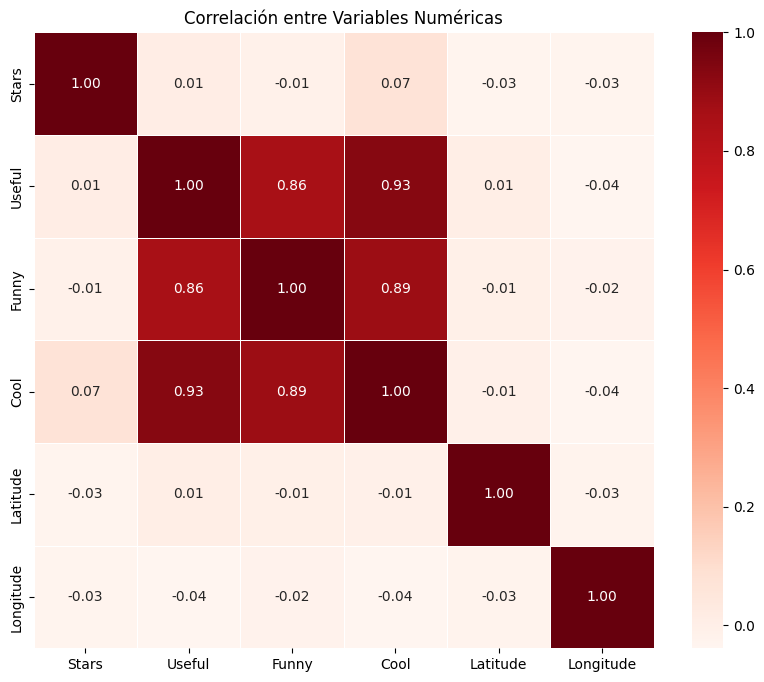

In [38]:
# Visualizamos la correlación entre variables numéricas
plt.figure(figsize=(10, 8))

sns.heatmap(columnas_x.corr(), annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre Variables Numéricas")

plt.show()

**Análisis**

La correlación entre variables se debe a que cuando se realiza valoración de un restaurante los campos **Useful, Funny y Cool** se completan por igual y tienen como significado global si es buena o mala la calificación.

Correlaciones entre variable:
  - Useful-Funny = 0.88
  - Useful-Cool = 0.99
  - Funny-Cool = 0.91

Diccionario:
  - Useful => números de votos como reseña útil (valores enteros).
  - Funny => número de votos como reseña graciosa (valores enteros).
  - Cool => número de votos como reseña cool (valores enteros).

### <font color="#ff5653">4- Cantidad de restaurantes mexicanos por año. </font>

In [25]:
# Nuevo dataframe para trabajar
yelp_4 = yelp.copy()

In [26]:
# Seleccionamos las columnas "Business_id" y "YearQuarter"
# "Business_id" tiene la identificacion de cada restaurante.
business_year = yelp_3[["Business_id", "YearQuarter"]]

In [ ]:
# Cambiamos el tipo de datos de la columna "YearQuarter" a estring
business_year["YearQuarter"] = business_year["YearQuarter"].astype(str)

In [ ]:
# Extraemos el año
business_year["Year"] = business_year["YearQuarter"].str[:4]  # Extrae el año

In [29]:
business_year = business_year.drop("YearQuarter", axis=1)

In [30]:
# Eliminamos las filas duplicadas
# Para evitar contar el mismo restaurante varias veces en un año.
business_year = business_year.drop_duplicates()

In [31]:
# Agrupamos los datos por "Year"-"Business_id", contamos la cantidad de restaurantes por trimestre por año.
business_year = business_year.groupby(["Year", "Business_id"]).size().reset_index(name="counts")

In [32]:
# Contamos la cantidad de restaurantes por año
business_year = business_year.groupby(["Year"])["counts"].sum().reset_index(name="total")

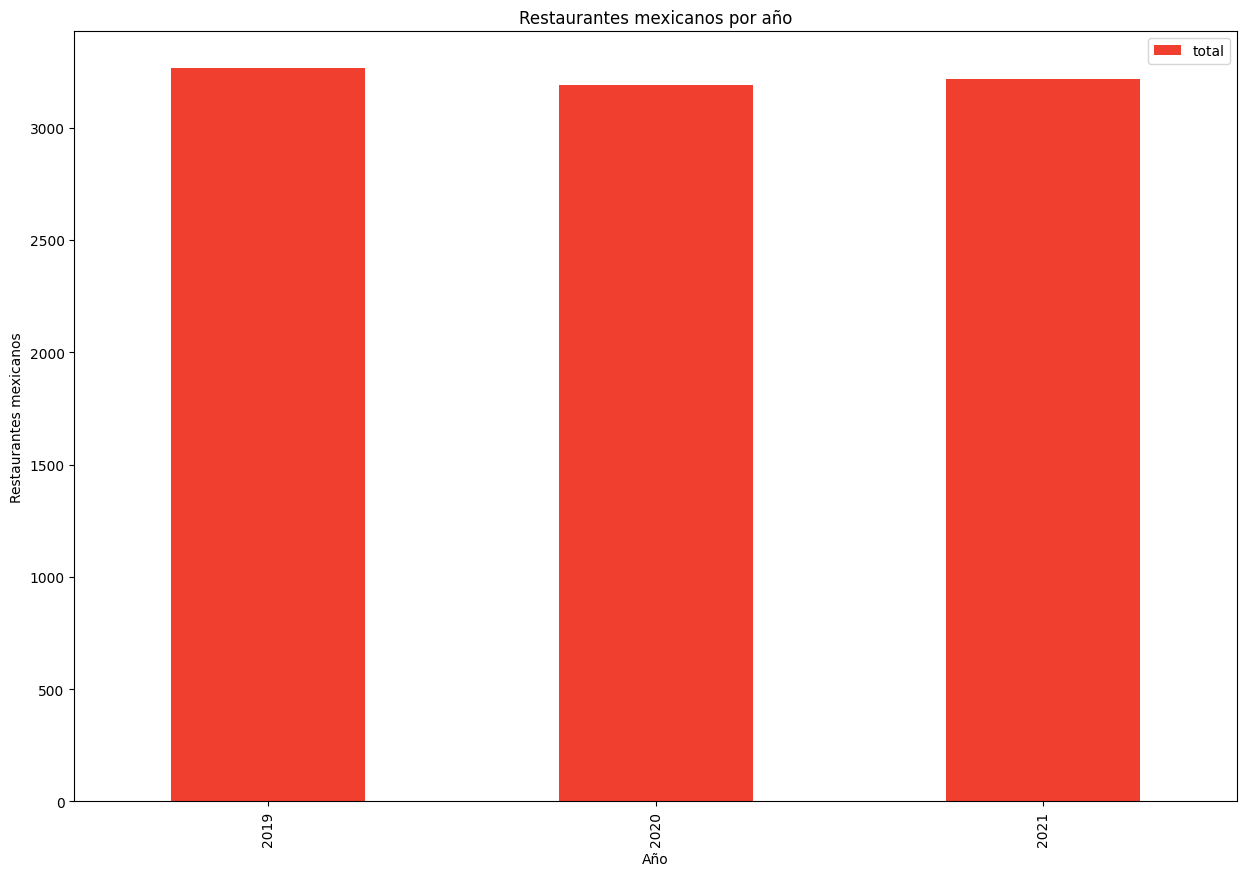

In [33]:
# Graficamos los datos
business_year.plot(kind="bar", x="Year", y="total", color=["#f03f2e"], figsize=(15, 10))

# Etiquetas: Titulo y ejes
plt.title("Restaurantes mexicanos por año")
plt.xlabel("Año")
plt.ylabel("Restaurantes mexicanos")

# Mostramos el gráfico.
plt.show()

In [34]:
business_year.head()

,Year,total
0,2019,3265
1,2020,3191
2,2021,3216


Análisis:
- Hay una disminución de restaurantes mexicanos para el año 2020. Puede deberse a la pandemia por COVID19 y las medidas que se tomaron de aislamiento social.
- Para el año 2021 aumenta la cantidad de restaurantes mexicanos. Esto pude darse debido a que se incorporo el servicio de delivery, se establecieron protocolos de trabajo y a la incorporación de elementos de protección personal.

### <font color="#ff5653">5- Cantidad de restaurantes mexicanos por trimestre. </font>

In [57]:
# Nuevo dataframe para trabajar
yelp_4 = yelp.copy()

In [58]:
# Seleccionamos las columnas "Business_id" y "YearQuarter"
# "Business_id" tiene la identificacion de cada restaurante.
business_quarter = yelp_4[["Business_id", "YearQuarter"]]

In [59]:
# Eliminamos las filas duplicadas
# Para evitar contar el mismo restaurante varias veces en cada trimestre por año.
business_quarter = business_quarter.drop_duplicates()

In [60]:
# Agrupamos los datos por "YearQuarter"-"Business_id", contamos la cantidad de restaurantes por trimestre por año.
business_quarter = business_quarter.groupby(["YearQuarter", "Business_id"]).size().reset_index(name="counts")

In [61]:
# Sumamos las ocurrencias de cada business_id por trimestre
business_quarter = business_quarter.groupby(["YearQuarter"])["counts"].sum().reset_index(name="total")

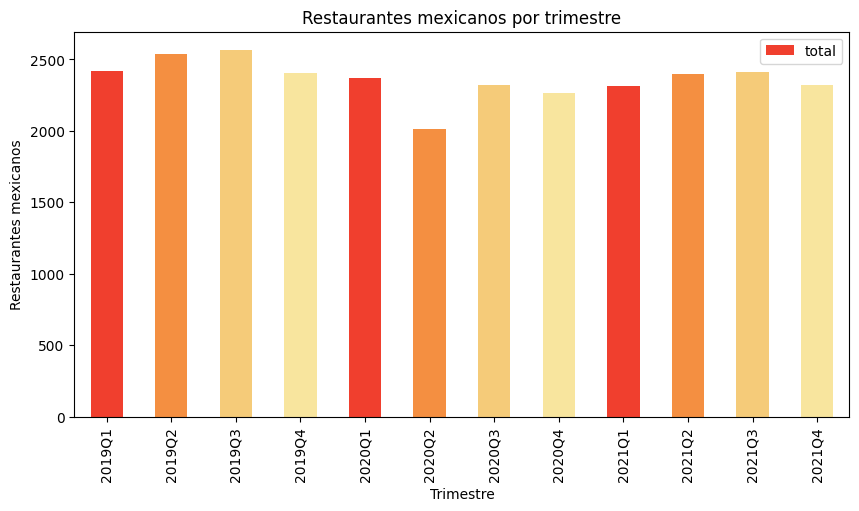

In [62]:
# Graficamos los datos
business_quarter.plot(kind="bar", x="YearQuarter", y="total", color=["#f03f2e","#f48f41","#f5cb79", "#f8e59e"], figsize=(10, 5))

# Etiquetas: Titulo y ejes
plt.title("Restaurantes mexicanos por trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Restaurantes mexicanos")

# Muestramos el gráfico.
plt.show()

In [63]:
business_quarter.head(12)

,YearQuarter,total
0,2019Q1,2422
1,2019Q2,2537
2,2019Q3,2566
3,2019Q4,2403
4,2020Q1,2369
5,2020Q2,2015
6,2020Q3,2320
7,2020Q4,2262
8,2021Q1,2311
9,2021Q2,2395


Análisis:
    
- Muestra un patrón que la cantidad de restaurantes mexicanos es **menor en el primer y cuarto trimestre de cada año**, y es **mayor en el segundo y tercer trimestre de cada año**.

- Para el **año 2020 la cantidad de restaurante por trimestre es menor** con respecto a los del año 2019 y 2021.

- El **segundo trimestre del año 2020** tiene una disminución mayor en la cantidad de restaurantes con respecto a los demas trimestres del mismo año. Esto puede ser por el inicio de la pandemia por COVID 19 el 16 de marzo del 2020.

- En el **tercer y cuarto trimestre del año 2020 aumenta la cantidad de restaurantes** siguiendo un patrón similar al resto de los trimestres de los demas años. Esto puede estar dado a la adopción de delivery y las medidas de protección personal por parte de la mayoria de los restaurantes que permitio seguir trabajando. 

### <font color="#ff5653"> 6- Cantidad de restaurantes mexicanos por estado. </font>

Se realizó el gráfico con información del último trimestre (cuarto trimestre del 2021) del periodo de datos, debido que seria lo mas representativo del mercado.

In [64]:
# Nuevo dataframe para trabajar
yelp_5 = yelp.copy()

In [65]:
# Selecciona las columnas "Business_id", "State" y "YearQuarter"
# "State" estan cada estado de EE.UU. donde hay restaurantes mexicanos.
business_state_trimestre = yelp_5[["Business_id", "State", "YearQuarter"]]

In [66]:
# Nos qudamos con la información solo del ultimo trimestre analizado (cuarto trimestre del año 2021)
business_state_trimestre = business_state_trimestre[(yelp_4["YearQuarter"] == "2021Q4")]

In [67]:
# Eliminamos las filas duplicadas
# Para no contar el mismo restaurante mas de una ves en cada estado.
business_state_trimestre = business_state_trimestre.drop_duplicates()

In [68]:
# Sumamos las ocurrencias de cada business_id por estado
business_state_trimestre = business_state_trimestre.groupby("State")["Business_id"].count()

In [69]:
# Restaurantes mexicanos por estado para el cuarto trimestre del año 2021
business_state_trimestre.head(15)

State
Arizona         281
California       95
Delaware         33
Florida         369
Idaho            88
Illinois         42
Indiana         266
Luisiana        106
Missouri        178
Nevada          174
Nueva Jersey     84
Pensilvania     345
Tennessee       263
Name: Business_id, dtype: int64

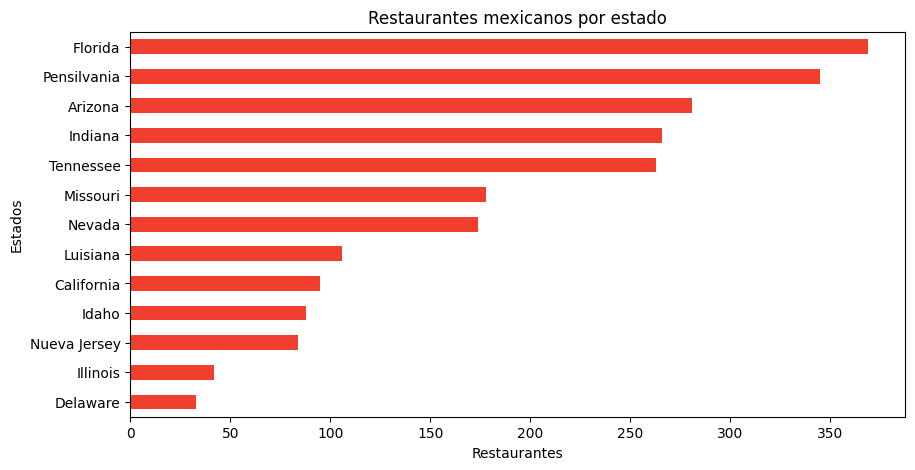

In [70]:
# Ordenamos los datos por "Restaurantes por estado"
business_state = business_state_trimestre.sort_values(ascending=True)

# Graficamos
business_state.plot(kind="barh", x="Estados", y="Número de negocios", color=["#f03f2e" ], figsize=(10, 5))

# Etiquetas: Titúlo y ejes
plt.title("Restaurantes mexicanos por estado")
plt.xlabel("Restaurantes")
plt.ylabel("Estados")

# Muestramos el gráfico.
plt.show()

In [71]:
# Restaurantes por estado
business_state = business_state_trimestre.sort_values(ascending=False)
business_state

State
Florida         369
Pensilvania     345
Arizona         281
Indiana         266
Tennessee       263
Missouri        178
Nevada          174
Luisiana        106
California       95
Idaho            88
Nueva Jersey     84
Illinois         42
Delaware         33
Name: Business_id, dtype: int64

In [72]:
business_state.sum()

2324

Análisis:
- Podemos ver que el estado con **mayor cantidad de restaurantes mexicanos es Florida (369)** seguido por Pensilvania (345) que se diferencian con el resto de los estados.

- El **80% de los restaurantes mexicanos (1859)** se encuentran en los estados de Florida (369), Pensilvania (345), Arizona (281), Indiana (266), Tennessee	(263), Missouri (178) y Nevada (174).

### <font color="#ff5653"> 7- Cantidad de sucursales por empresa. </font>

In [40]:
# Nuevo dataframe para trabajar
yelp_5 = yelp.copy()

In [41]:
# Seleccionamos las columnas "Business_id", "Name" y "YearQuarter"
business_name_trimestre = yelp_5[["Business_id", "Name", "YearQuarter"]]

In [42]:
# Nos qudamos con la información solo del ultimo trimestre analizado (cuarto trimestre del año 2021)
business_name_trimestre = business_name_trimestre[(yelp_5["YearQuarter"] == "2021Q4")]

In [43]:
# Eliminamos las filas duplicadas
business_name_trimestre = business_name_trimestre.drop_duplicates()

In [44]:
# Sumamos las ocurrencias de cada business_id por Nombre
business_name_trimestre = business_name_trimestre.groupby("Name")["Business_id"].count()

In [45]:
# Ordenamos de manera descendente 
business_name_trimestrex = business_name_trimestre.sort_values(ascending=False)

In [46]:
business_name_trimestrex.head(25) 

Name
Taco Bell                                190
Chipotle Mexican Grill                   120
Chili's                                   57
Jack in the Box                           56
QDOBA Mexican Eats                        41
Tijuana Flats                             16
Moe's Southwest Grill                     16
Taco Bus                                   9
Del Taco                                   8
Los Betos                                  8
Fuzzy's Taco Shop                          7
Viva Burrito                               6
On The Border Mexican Grill & Cantina      6
El Pollo Loco                              6
Chuy's                                     6
La Hacienda                                6
Lolis Mexican Cravings                     6
Grand Hacienda                             5
Margaritas Mexican Restaurant              5
Oscar's Taco Shop                          5
Carl's Jr                                  5
Las Palmas Mexican Restaurant              5
Calif

In [47]:
# Cantidad de restaurantes mexicanos
business_name_trimestrex.sum()

2324

- Top 25 de empresas con mayor cantidad de sucursales

In [48]:
top_25 = business_name_trimestre.nlargest(25, keep="first")

In [49]:
top_25

Name
Taco Bell                                190
Chipotle Mexican Grill                   120
Chili's                                   57
Jack in the Box                           56
QDOBA Mexican Eats                        41
Moe's Southwest Grill                     16
Tijuana Flats                             16
Taco Bus                                   9
Del Taco                                   8
Los Betos                                  8
Fuzzy's Taco Shop                          7
Chuy's                                     6
El Pollo Loco                              6
La Hacienda                                6
Lolis Mexican Cravings                     6
On The Border Mexican Grill & Cantina      6
Viva Burrito                               6
California Tortilla                        5
Carl's Jr                                  5
Condado Tacos                              5
Grand Hacienda                             5
Las Palmas Mexican Restaurant              5
Marga

In [50]:
# Ordenamos de manera descendente, para que me grafique de mayor a menor los datos.
top_25 = top_25.sort_values(ascending=True)

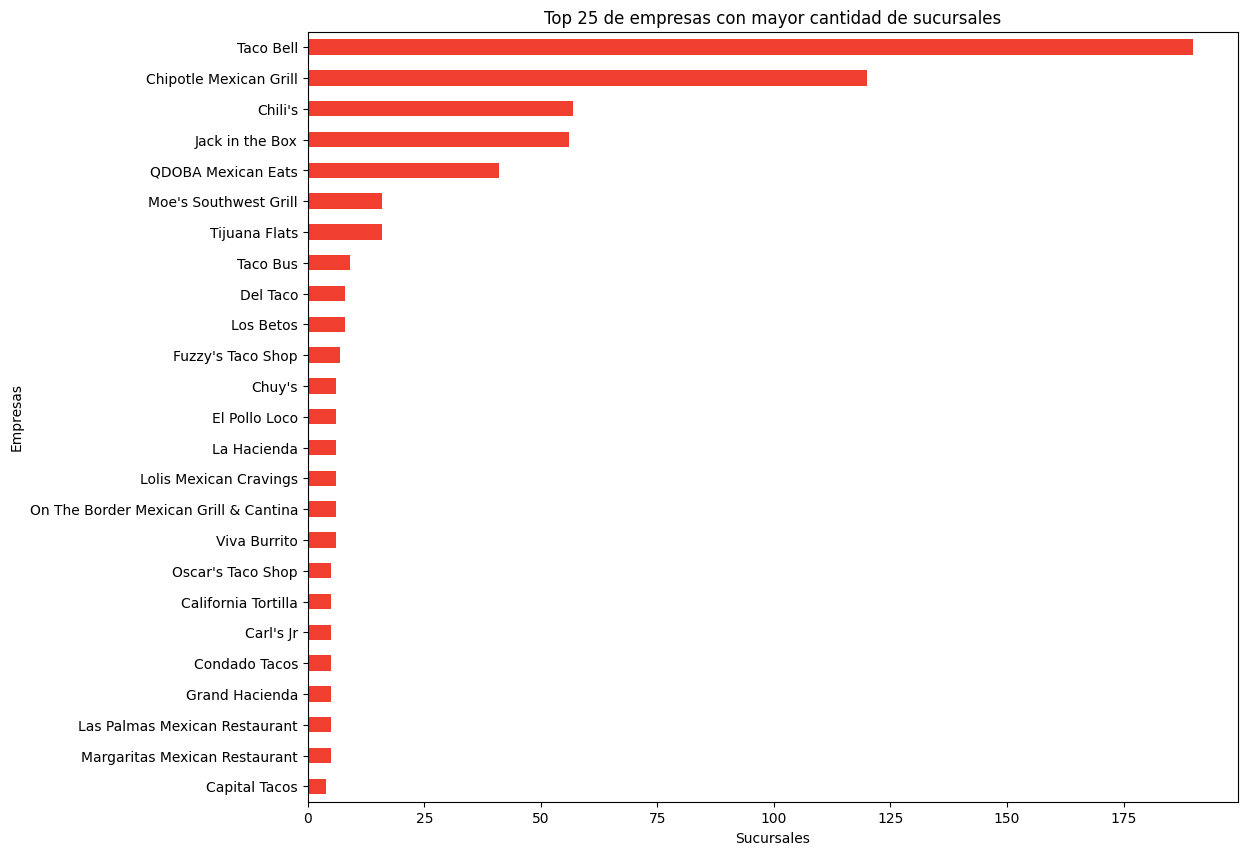

In [51]:
# Graficar las empresas y la cantidad de restaurantes mexicanos por empresa.
plt.figure(figsize=(12, 10))
top_25.plot(kind="barh", color="#f03f2e")
plt.title("Top 25 de empresas con mayor cantidad de sucursales")
plt.xlabel("Sucursales")
plt.ylabel("Empresas")
plt.show()

- Top 7 de empresas con mayor cantidad de sucursales

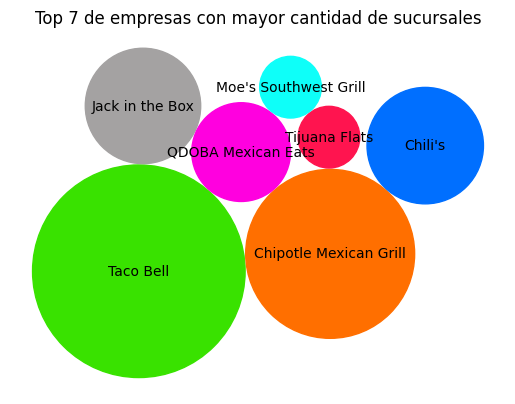

In [52]:
browser_market_share = {
    "browsers": ["Taco Bell", "Chipotle Mexican Grill", "Chili's", "Jack in the Box", "QDOBA Mexican Eats", "Tijuana Flats", "Moe's Southwest Grill"],
    "market_share": [190, 120, 57, 56, 41, 16, 16],
    "color": ["#39e200", "#ff6f00", "#006fff", "#a4a2a2", "#ff00df", "#ff144f", "#0efff9",]
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment="center", verticalalignment="center")


bubble_chart = BubbleChart(area=browser_market_share["market_share"],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share["browsers"], browser_market_share["color"])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title("Top 7 de empresas con mayor cantidad de sucursales")

plt.show()

In [87]:
# Top 7 de empresas con mas restaurantes mexicanos.
top_7 = business_name_trimestre.nlargest(7, keep="first")

top_7

Name
Taco Bell                 190
Chipotle Mexican Grill    120
Chili's                    57
Jack in the Box            56
QDOBA Mexican Eats         41
Moe's Southwest Grill      16
Tijuana Flats              16
Name: Business_id, dtype: int64

### <font color="#ff5653"> 8- Evolución de la cantidad de restaurantes mexicanos por empresa por trimestre.</font>

In [88]:
# Nuevo dataframe para trabajar
yelp_6 = yelp.copy()

In [89]:
# Creamos la variable con las 7 empresas de restaurantes mexicanos mas grandes.
top_7 = ["Taco Bell", "Chipotle Mexican Grill", "Chili's", "Jack in the Box", "QDOBA Mexican Eats", "Tijuana Flats", "Moe's Southwest Grill"]

In [90]:
# Filtramos el dataframe por las 7 empresas de restaurantes
yelp6_top7 = yelp_6[(yelp_6["Name"].isin(top_7))]

In [ ]:
# Vemos las columnas y filas
yelp6_top7.head(5)

In [ ]:
# Convertimos el tipo de dato de "YearQuarter" a string
yelp6_top7["YearQuarter"] = yelp6_top7["YearQuarter"].astype(str)

In [93]:
# Agrupamos por "YearQuarter" y "Name" y contamos los "Business_id" únicos
# Para obtener la cantidad de negocios por marca por trimestre
restaurantes_por_trimestre = yelp6_top7.groupby(["YearQuarter", "Name"])["Business_id"].nunique()

In [ ]:
restaurantes_por_trimestre

In [95]:
# Desapilamos el multi-índice para que "Name" sea una columna y no un índice
restaurantes_por_trimestre = restaurantes_por_trimestre.reset_index()

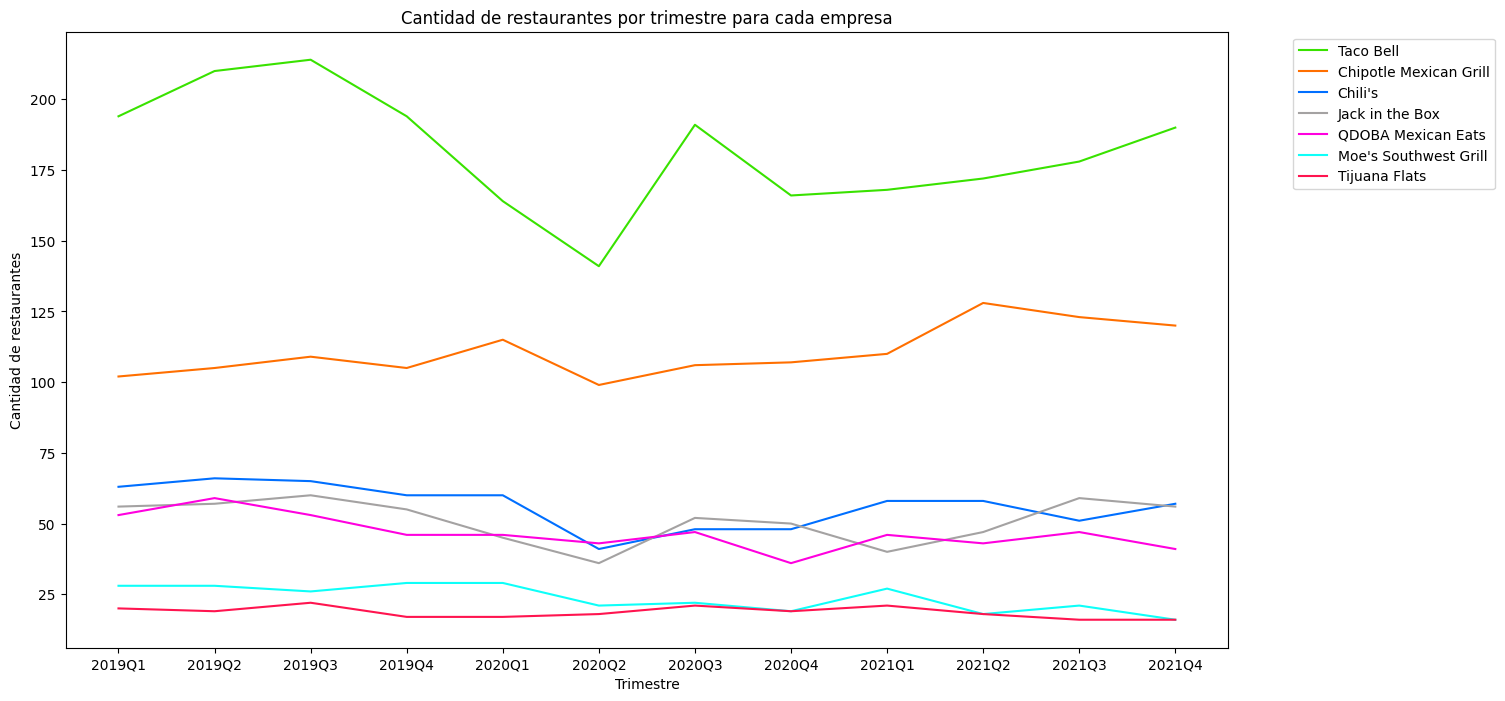

In [96]:
# Creamos el gráfico
plt.figure(figsize=(15,8))
colores = ["#006fff", "#ff6f00", "#a4a2a2", "#0efff9", "#ff00df", "#39e200", "#ff144f"]  
lines = []  # Aquí guardaremos las líneas para la leyenda
labels = []  # Aquí guardaremos las etiquetas para la leyenda

for i, name in enumerate(restaurantes_por_trimestre["Name"].unique()):
    data = restaurantes_por_trimestre[restaurantes_por_trimestre["Name"] == name]
    line, = plt.plot(data["YearQuarter"], data["Business_id"], color=colores[i % len(colores)])
    lines.append(line)
    labels.append(name)

# Ordenamos las leyendas de mayor a menor
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[1].get_ydata()[-1], reverse=True))

plt.xlabel("Trimestre")
plt.ylabel("Cantidad de restaurantes")
plt.title("Cantidad de restaurantes por trimestre para cada empresa")
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Análisis:
- La empresas se mantienen constantes en la cantidad de sucursales, a excepción de la empresa Chipotle Mexican Grill que en el periodo análizado tiene una tendencia a crecer.

Media de la cantidad de restaurantes mexicanos por empresa por trimestre por año.

In [ ]:
restaurantes_por_trimestre.info()

In [98]:
restaurantes_por_trimestre.head(3)

,YearQuarter,Name,Business_id
0,2019Q1,Chili's,63
1,2019Q1,Chipotle Mexican Grill,102
2,2019Q1,Jack in the Box,56


In [99]:
# Calculamos la media para cada empresa y el desvio estandar total.
restaurantes_crecimiento_x = restaurantes_por_trimestre.groupby(["Name"]).agg({"Business_id": ["mean", "std"]})

In [100]:
restaurantes_crecimiento_x

Business_id           
                              mean        std
Name                                         
Chili's                  56.250000   7.676706
Chipotle Mexican Grill  110.750000   8.904800
Jack in the Box          51.083333   7.668807
Moe's Southwest Grill    23.666667   4.677477
QDOBA Mexican Eats       46.666667   6.080271
Taco Bell               181.833333  20.919036
Tijuana Flats            18.666667   2.015095

In [101]:
# Ordenamos de mayor media a menor.
df_mean_sorted = restaurantes_crecimiento_x.sort_values(by=("Business_id", "mean"), ascending=False)

In [102]:
df_mean_sorted

Business_id           
                              mean        std
Name                                         
Taco Bell               181.833333  20.919036
Chipotle Mexican Grill  110.750000   8.904800
Chili's                  56.250000   7.676706
Jack in the Box          51.083333   7.668807
QDOBA Mexican Eats       46.666667   6.080271
Moe's Southwest Grill    23.666667   4.677477
Tijuana Flats            18.666667   2.015095

Análisis:
- Para cada trimestre análizado, la media muestra la cantidad promedio de sucursales abiertas por empresa con una variacion de cierre o apertura de sucursales dado por el desvio estandar.
- La empresa Chipotle muestra una gran cantidad de sucursales,  una estabilidad en la cantidad de apertura y cierre de restaurantes y una tendencia al crecimiento en cantidad de sucursales.

### <font color="#ff5653"> 9- Cantidad de restaurantes mexicanos por empresa por estado. </font>

In [ ]:
yelp6_top7.head(2)

In [104]:
yelp6_top7_filtrado = yelp6_top7.loc[yelp6_top7['YearQuarter'] == '2021Q4']

In [ ]:
yelp6_top7_filtrado

In [106]:
# Agrupamos por "State" y "Name" y contamos los "Business_id" únicos
# Para obtener la cantidad de negocios por marca por estado.
restaurantes_por_estado = yelp6_top7_filtrado.groupby(["State", "Name"])["Business_id"].nunique()

In [112]:
restaurantes_por_estado

,State,Name,Business_id
0,Arizona,Chili's,4
1,Arizona,Chipotle Mexican Grill,8
2,Arizona,Jack in the Box,7
3,Arizona,Taco Bell,14
4,California,Chili's,1
...,...,...,...
59,Tennessee,Chipotle Mexican Grill,12
60,Tennessee,Jack in the Box,6
61,Tennessee,Moe's Southwest Grill,2
62,Tennessee,QDOBA Mexican Eats,1


In [113]:
# Desapilamos el multi-índice para que "Name" sea una columna y no un índice
restaurantes_por_estado = restaurantes_por_estado.reset_index()

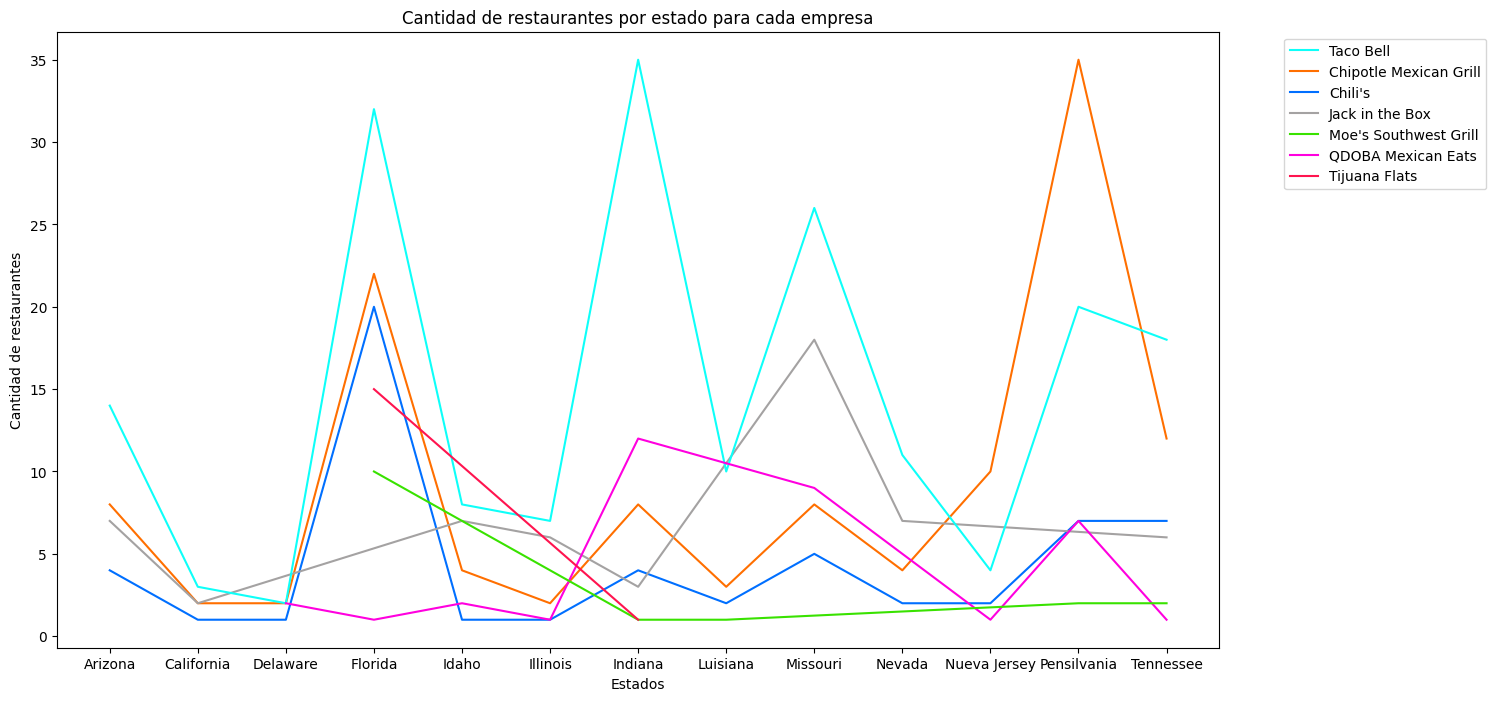

In [114]:
# Creamos el gráfico
plt.figure(figsize=(15,8))
colores = ["#006fff", "#ff6f00", "#a4a2a2", "#0efff9", "#ff00df", "#39e200", "#ff144f"]  
lines = []  # Aquí guardaremos las líneas para la leyenda
labels = []  # Aquí guardaremos las etiquetas para la leyenda

for i, name in enumerate(restaurantes_por_estado["Name"].unique()):
    data = restaurantes_por_estado[restaurantes_por_estado["Name"] == name]
    line, = plt.plot(data["State"], data["Business_id"], color=colores[i % len(colores)])
    lines.append(line)
    labels.append(name)

# Ordenamos las leyendas de mayor a menor
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[1].get_ydata()[-1], reverse=True))

plt.xlabel("Estados")
plt.ylabel("Cantidad de restaurantes")
plt.title("Cantidad de restaurantes por estado para cada empresa")
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Análisis:
- Vemos que Taco Bell es la que tiene mayor de cantidad de restaurantes en cada estado a excepción de cuatro estados (DE, ID, NJ, PA).
- Chipotle Mexican Grill, es la segunda cadena que mas restaurante tiene pero en un solo estado (PA) esta como primera en cantidad de restaurantes.
- Una de las empresas con menor cantidad de sucursales como Tijuana Flats esta primera en cantidad de restaurantes en un solo estado (ID).

In [115]:
# Vemos la distribucion de la cantidad de sucursales por estados.
yelp6_top7x = yelp6_top7.copy()

In [116]:
# Filtramos para obtener el primer trimestre del 2019
yelp6_top7_filtrado_2019q1 = yelp6_top7x.loc[yelp6_top7x["YearQuarter"] == "2019Q1"]

In [117]:
restaurantes_por_estado_2019q1 = yelp6_top7_filtrado_2019q1.groupby(["State", "Name"])["Business_id"].nunique()

In [118]:

restaurantes_por_estado_2019q1 = restaurantes_por_estado_2019q1.reset_index()

In [41]:
# Con este codigo veo el grafico por empresa para cada estado.
# restaurantes_por_estado_2019q1x=restaurantes_por_estado_2019q1[restaurantes_por_estado_2019q1["Name"] == "Chipotle Mexican Grill"]

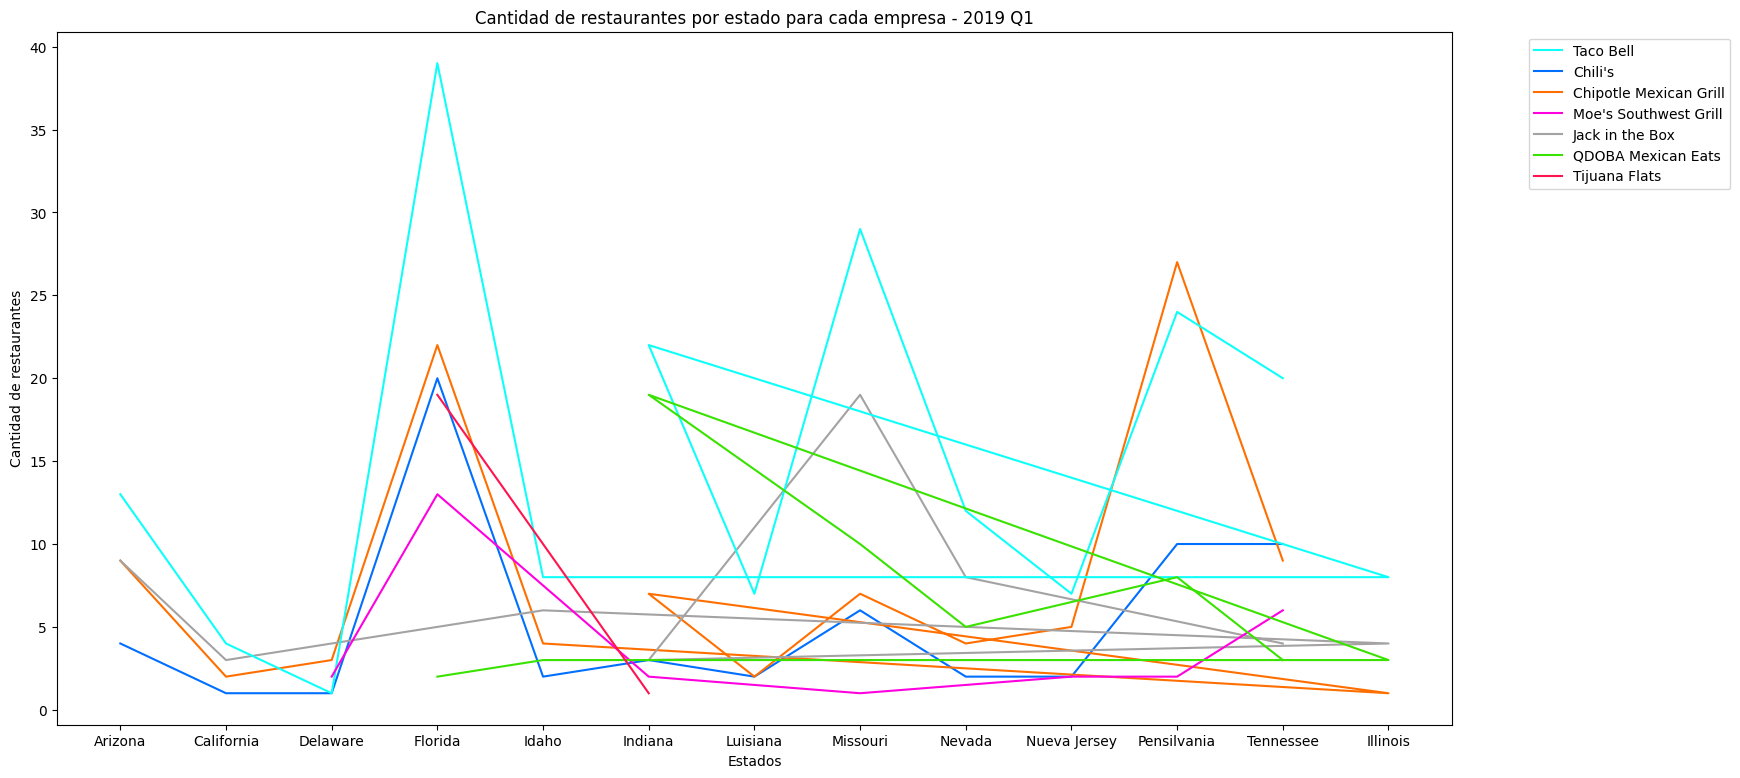

In [119]:
# Creamos el gráfico
# Grafica todo sin sentido, pero no se encontro el problema de esto.

plt.figure(figsize=(18,9))
colores = ["#006fff", "#ff6f00", "#a4a2a2", "#0efff9", "#ff00df", "#39e200", "#ff144f"]  
lines = []  # Aquí guardaremos las líneas para la leyenda
labels = []  # Aquí guardaremos las etiquetas para la leyenda

for i, name in enumerate(restaurantes_por_estado_2019q1["Name"].unique()):
    data = restaurantes_por_estado_2019q1[restaurantes_por_estado_2019q1["Name"] == name]
    line, = plt.plot(data["State"], data["Business_id"], color=colores[i % len(colores)])
    lines.append(line)
    labels.append(name)

# Ordenamos las leyendas de mayor a menor
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[1].get_ydata()[-1], reverse=True))

plt.xlabel("Estados")
plt.ylabel("Cantidad de restaurantes")
plt.title("Cantidad de restaurantes por estado para cada empresa - 2019 Q1")
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### <font color="#ff5653"> 10- Calificación de los restaurantes mexicanos. </font>

In [120]:
# Nuevo dataframe para trabajar
yelp_7 = yelp.copy()

In [ ]:
yelp_7.head(2)

In [122]:
# Agrupamos por "Stars" y "Name" y contamos los "Business_id" únicos
# Para obtener la cantidad de negocios por calificacion (1 al 5)
stars_name = yelp_7.groupby(["Stars", "Name"])["Business_id"].nunique()

In [123]:
# Desapilamos el multi-índice para que "Name" sea una columna y no un índice
stars_name = stars_name.reset_index()

In [124]:
stars_name

,Stars,Name,Business_id
0,1.0,2 Amigos,1
1,1.0,3 Agaves,1
2,1.0,3 Agaves Mexican Restaurant & Cantina,1
3,1.0,3 Margaritas Mexican Restaurant,1
4,1.0,4 Seasons Grill Mexican Restaurant,1
...,...,...,...
9967,5.0,goa taco,1
9968,5.0,la 5th av tacos,1
9969,5.0,la bamba,1
9970,5.0,mega burrito,1


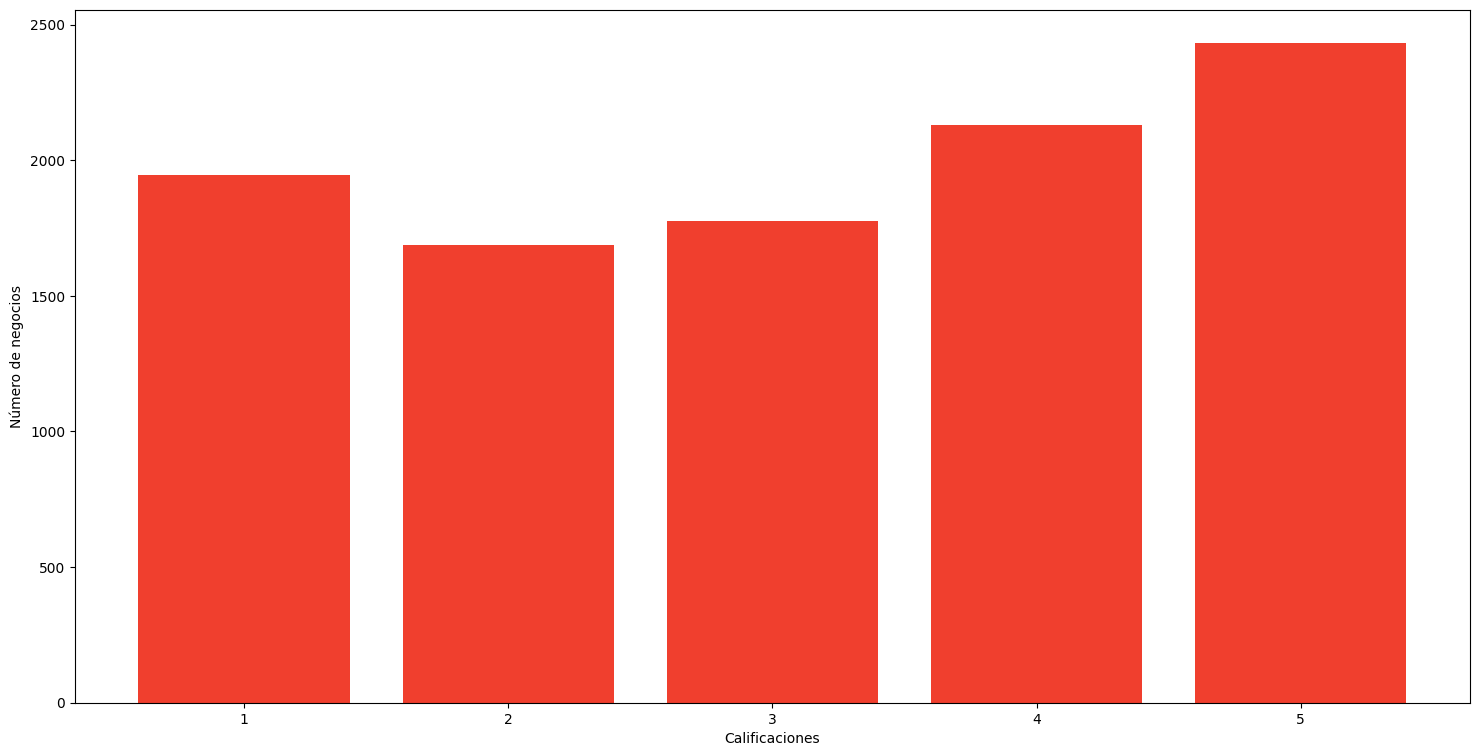

In [125]:
# Agrupamos el DataFrame por "Stars" y contamos la cantidad de negocios para cada calificación
star_counts = stars_name["Stars"].value_counts()

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots(figsize=(18,9))


# Crear un gráfico de barras con las calificaciones en el eje x y la cantidad de negocios en el eje y
ax.bar(star_counts.index, star_counts.values, color="#f03f2e")

# Etiquetas de los ejes
ax.set_xlabel("Calificaciones")
ax.set_ylabel("Número de negocios")

plt.show()

Análisis:
- Se muestra la cantidad de negocios que hay para cada calificación del 1 al 5. Si tomamos a la calificación 3 como neutral, vemos que hay mas calificaciones positivas que negativas.

### <font color="#ff5653"> 11- Nube de palabras de las reseñas de los clientes. </font>

In [126]:
# Nuevo dataframe para trabajar
yelp_8 = yelp.copy()

In [129]:
# Extraemos del dataframe la columna "Text"
text = yelp_8["Text"]

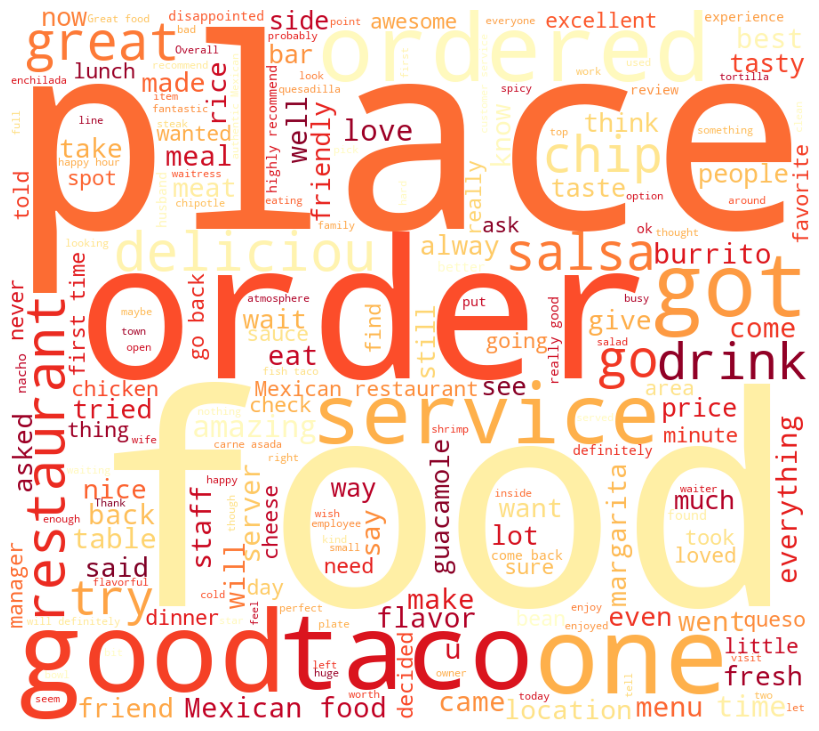

In [128]:
# Creamos la nube de palabras
wordcloud = WordCloud(width = 900, height = 800, background_color ="white", colormap = "YlOrRd", stopwords = None, min_font_size = 10).generate(' '.join(text))

# Mostramos la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Las palabras que mas se repiten en las reseñas de los clientes son:

|    |               |      
|----------|------------------------|
|Place     | Lugar                  |
|Food      | Alimento               |
|Good      | Bien                   |
|Order     | Orden                  | 
|Taco      | Taco (Plato mexicano)  |
|Deliciou  | Delicioso              |   
|Service   | Servicio               |
|One       | Uno                    |
|Ordered   | Ordenado               |    
|Love      | Amor                   |